## Project Goal

The goal of the project is to build Machine Learning model that can classify news articles as either FAKE or REAL.
This is a classification problem and the problem I am trying to solve is the identification and classification of fake news. By doing so, we can help combat the spread of fake news and disinformation.


## Motivation

There is a key difference between disinformation and misinformation right. Disinformation refers to the deliberate spread of false or misleading information. It’s intentional. It’s often spread by governments, organizations or high-profile individuals with an agenda. It could be to advance a political or social goal. I particularly care about the spread of disinformation and I strongly believe in the potential of Machine Learning and NLP techniques to address this problem.


## Business value and impact 

One of the practical applications I could think of is that, a fake news classification model with 100% accuracy can be integrated with platforms and systems of media houses, to provide users with reliable information and reduce the spread of disinformation.

## Supervised Learning

Supervised learning is a type of machine learning where a model is trained on labeled data. The goal is to learn a mapping from input variables (also known as features) to output variables (also known as labels) based on the examples in the training set. Once the model is trained, it can be used to make classifications on new, unseen data.

Classification is one of the 2 main types of supervised learning. In classification, the output variable is categorical, such as "FAKE" or "REAL" in our case.

## NLP and NLP Techniques

NLP is a branch of artificial intelligence that focuses on the interaction between computers and humans using natural language. It involves developing algorithms and techniques that can understand, analyze, and generate human language.

For the purpose of our project, the following NLP techniques are used.

- Tokenization
- Stop word removal
- Stemming and Lemmatization
- CountVectorizer for text classification with Python
- TfidfVectorizer for text classification with Python

## Supervised Learning with NLP
Supervised learning with NLP is a type of machine learning in which algorithms are trained on labeled data to classify new examples into one of the predefined categories (real or fake news, in this example) based on patterns and relationships in the training data. In the context of NLP, the data is usually in the form of text, such as news articles, social media posts, or other written content.

## Scientific Kit for Machine Learning
We will use Scikit learn to create features and train a model. Scikit-learn (short for "Scientific Kit for Machine Learning") is a free and open-source Python library for machine learning. It provides a wide range of tools and algorithms for supervised learning. Scikit-learn is built on top of other popular Python libraries such as NumPy and SciPy, and is designed to be easy to use and integrate with other scientific libraries.

Scikit-learn is a popular choice for machine learning tasks in Python, due to its ease of use, wide range of features, and strong community support.

## Supervised Learning steps

- Collect and preprocess our data
- Determine the lable and features
- Split data into training and test sets
- Feature engineering - extract features from the text to help predict the label
- Train the model
- Evaluate the trained model using the test set

## Project flowchart

This project focuses on stages from Data Acquisition to Model Evaluation.

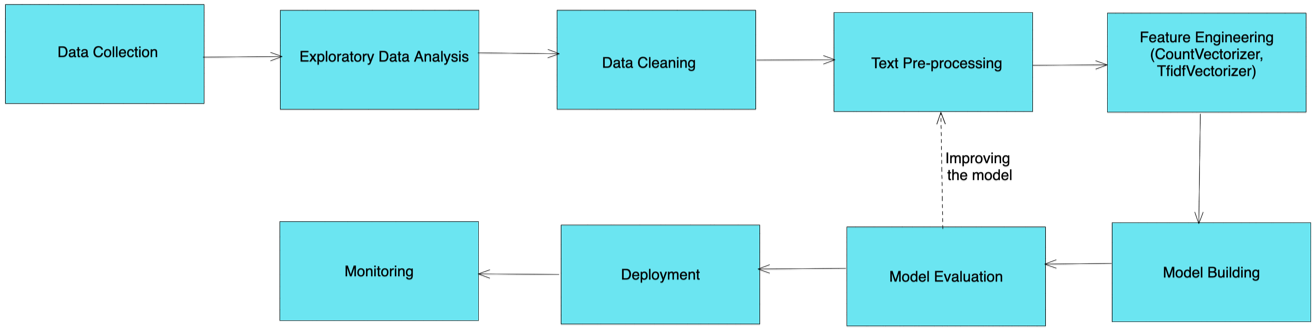

## Import the necessary modules

In [1]:
import numpy as np
import pandas as pd
import re
  
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
# read in the CSV file "fake_or_real_news.csv" and store it in a pandas DataFrame called "fake_or_real_news"
fake_or_real_news = pd.read_csv('/Users/brindhamanivannan/NLP/Fake_News/fake_or_real_news.csv')
fake_or_real_news

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
type(fake_or_real_news)

pandas.core.frame.DataFrame

## Exploratory Data Analysis

In [4]:
fake_or_real_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
fake_or_real_news.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [6]:
fake_or_real_news.shape

(6335, 4)

In [7]:
fake_or_real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
fake_or_real_news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

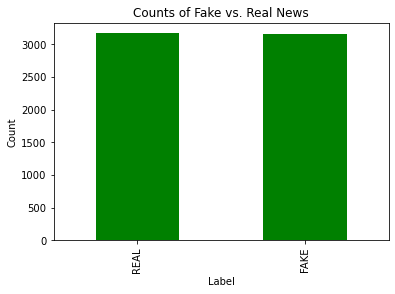

In [9]:
fake_or_real_news['label'].value_counts().plot(kind='bar', color='green')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Counts of Fake vs. Real News')
plt.show()


In [10]:
print(fake_or_real_news['text'][3]) #fake

— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Democrats to start listening to the voters. Stop running the same establishment candidates. 
— People For Bernie (@People4Bernie) November 9, 2016 If Dems didn't want a tight race they shouldn't have worked against Bernie. 
— Walker Bragman (@WalkerBragman) November 9, 2016 
New York Times columnist Paul Krugman, who was one of Hillary Clinton’s most outspoken surrogates during the contentious Democratic primary, blamed Clinton’s poor performance on Green Party candidate Jill Stein, who has so far received a negligible number of votes nationally, saying Stein was the Ralph Nader of 2016 in preventing a Clinton victory. The account @BerniesTeachers threw Krugman’s analysis back in his face. Your candidate was the issue. Take responsibility. https://t.co/KHyOuUSrFS 
— Teachers for Bernie (@BerniesTeachers) November 9, 2016 
Ana Navarro, a Republican who recently endorsed Hillary Clinton, summed up

In [11]:
print(fake_or_real_news['text'][4]) #real

It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.

Trump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., and Ohio Gov. John Kasich and aren't giving up just yet.

A big win in New York could tip the scales for both the Republican and Democratic front-runners in this year's race for the White House. Clinton and Trump have each suffered losses in recent contests, shifting the momentum to their rivals.

"We have won eight out of the last nine caucuses and primaries! Cheer!" Sanders recently told supporters.

While wins in New York for Trump and Clinton are expected, the margins of those victories are also important.

Trump needs to capture more than 50 percent of the vote statewide if he wants to be positioned to win all of the state's 95 GOP delegates. That would put him one step closer to avoiding a contested convention.

In [12]:
print(fake_or_real_news['title'][3]) #fake

Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'


In [13]:
print(fake_or_real_news['title'][4]) #real

The Battle of New York: Why This Primary Matters


In [14]:
# Wordcloud
# Create a string that contains all the titles in the DataFrame separated by spaces
title_text = ' '.join(fake_or_real_news['title'].values)
print(type(title_text))

<class 'str'>


In [15]:
# Create a WordCloud object and generate the word cloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(title_text)


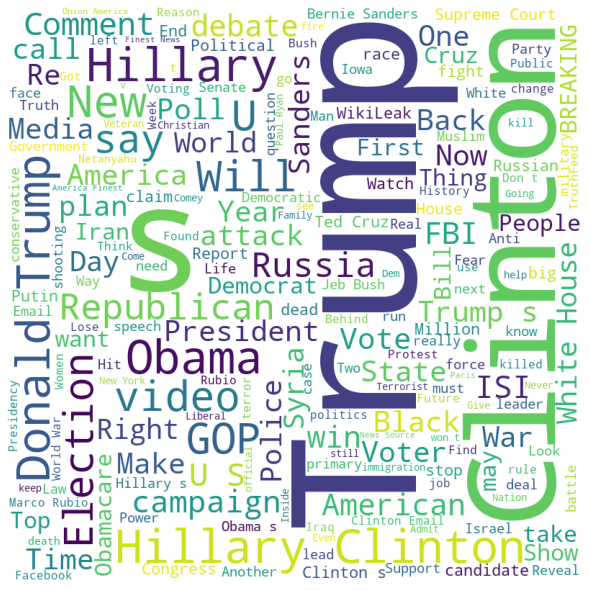

In [16]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [17]:
fake_or_real_news.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


In [18]:
fake_or_real_news.isnull().sum() 

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [19]:
fake_or_real_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [20]:
# Concatenate the title and text columns for better accuracy & prediction
fake_or_real_news['full_content'] = fake_or_real_news['title']+' '+fake_or_real_news['text']
fake_or_real_news['full_content']

0       You Can Smell Hillary’s Fear Daniel Greenfield...
1       Watch The Exact Moment Paul Ryan Committed Pol...
2       Kerry to go to Paris in gesture of sympathy U....
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: full_content, Length: 6335, dtype: object

In [21]:
fake_or_real_news.head()

,Unnamed: 0,title,text,label,full_content
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


## Text pre-processing

In [22]:
print(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
port_stem = PorterStemmer()
port_stem

<PorterStemmer>

In [24]:
def stemming(content):
    
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # keep only words and aplhabets
    stemmed_content = stemmed_content.lower()   
    stemmed_content = stemmed_content.split() 
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [25]:
fake_or_real_news['full_content'] = fake_or_real_news['full_content'].apply(stemming)
fake_or_real_news['full_content']

0       smell hillari fear daniel greenfield shillman ...
1       watch exact moment paul ryan commit polit suic...
2       kerri go pari gestur sympathi u secretari stat...
3       berni support twitter erupt anger dnc tri warn...
4       battl new york primari matter primari day new ...
                              ...                        
6330    state depart say find email clinton specialist...
6331    p pb stand plutocrat pentagon p pb stand pluto...
6332    anti trump protest tool oligarchi inform anti ...
6333    ethiopia obama seek progress peac secur east a...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: full_content, Length: 6335, dtype: object

## Determine the label and the feature

In [26]:
# Label
# Let us create a series to store the label

y = fake_or_real_news.label
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [28]:
type(y)

pandas.core.series.Series

In [27]:
# Feature

X = fake_or_real_news['full_content']
X

0       smell hillari fear daniel greenfield shillman ...
1       watch exact moment paul ryan commit polit suic...
2       kerri go pari gestur sympathi u secretari stat...
3       berni support twitter erupt anger dnc tri warn...
4       battl new york primari matter primari day new ...
                              ...                        
6330    state depart say find email clinton specialist...
6331    p pb stand plutocrat pentagon p pb stand pluto...
6332    anti trump protest tool oligarchi inform anti ...
6333    ethiopia obama seek progress peac secur east a...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: full_content, Length: 6335, dtype: object

In [29]:
type(X)

pandas.core.series.Series

## Split data into training and test set

In [30]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)


In [31]:
X_train

2576    reader refer us englishman pat condel brexit t...
1539    think mani doom sayer trump get offic report c...
5163    berni california endgam elect photo number quo...
2615    said find liam neeson lorena garcia kyle chand...
4270    well fargo rot top well fargo rot top well far...
                              ...                        
662     new memori flight love one left legaci us debb...
3261    trump hit magic number deleg requir nomin pres...
5883    reason economi boom decemb job growth number m...
2933    trump will meet n korea kim want renegoti pari...
797     cruz campaign could stop trump rubio becam run...
Name: full_content, Length: 4244, dtype: object

In [32]:
X_test

4221    trump threaten lawsuit slant new york time don...
1685    plan parenthood abort pill usag rival surgeri ...
3348    nation review diss donald trump magazin plan w...
2633    poll donald trump ben carson domin gop field f...
975     obama administr announc halt new coal leas oba...
                              ...                        
3888    starbuck barista stop write race togeth cup ma...
2015    poll percent voter say elect could stolen emai...
5860    barbara mikulski longest serv femal senat hist...
3071    thing improv mental health prev post page next...
4284    jeb bush campaign gone wrong bush burn consum ...
Name: full_content, Length: 2091, dtype: object

In [33]:
y_train

2576    FAKE
1539    FAKE
5163    REAL
2615    FAKE
4270    FAKE
        ... 
662     REAL
3261    REAL
5883    REAL
2933    REAL
797     REAL
Name: label, Length: 4244, dtype: object

In [34]:
y_test

4221    REAL
1685    FAKE
3348    REAL
2633    REAL
975     REAL
        ... 
3888    REAL
2015    FAKE
5860    REAL
3071    FAKE
4284    REAL
Name: label, Length: 2091, dtype: object

In [35]:
X_train.shape, X_test.shape


((4244,), (2091,))

In [36]:
y_train.shape, y_test.shape

((4244,), (2091,))

## Feature Engineering

Feature engineering, which is an important step in the process of building a machine learning model with NLP data, involves transforming raw text data into a numerical representation that can be used as input to the machine learning algorithms.

Machine learning algorithms operate on numerical data, so transforming raw text data into a numerical representation is necessary in order to use the data as input to these algorithms.

In this project, we will be using CountVectorizer and TfidfVectorizer techniques to convert a collection of text documents into numerical feature vectors.

## CountVectorizer for text classification

In [37]:
# Creating count vectors for the documents

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english') # stop words are removed
count_vectorizer

CountVectorizer(stop_words='english')

In [38]:
# Transform the training data: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)
count_train

<4244x36626 sparse matrix of type '<class 'numpy.int64'>'
	with 993781 stored elements in Compressed Sparse Row format>

In [39]:
# Transform the test data: count_test 
count_test = count_vectorizer.transform(X_test.values)
count_test

<2091x36626 sparse matrix of type '<class 'numpy.int64'>'
	with 476514 stored elements in Compressed Sparse Row format>

In [40]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['aa', 'aaa', 'aab', 'aadmi', 'aaeeb', 'aah', 'aaib', 'aaingr', 'aalia', 'aaluijqn']


In [41]:
# X_train.values correspond to the text data that will be transformed into a numerical representation
count_train.A # The values can be accessed by using the .A attribute

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
count_test.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
type(count_train)

scipy.sparse._csr.csr_matrix

In [50]:
count_train.shape

(4244, 36626)

In [51]:
count_test.shape

(2091, 36626)

## TfidfVectorizer for text classification

In [44]:
# Creating tf-idf vectors for the documents

# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

The max_df parameter is set to 0.7, which means that words that have a document frequency (i.e., the number of documents that a word appears in) greater than 0.7 will be ignored by the TfidfVectorizer. This parameter is used to reduce the dimensionality of the numerical representation by ignoring words that occur too frequently in the text data.

In [45]:
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_train

<4244x36626 sparse matrix of type '<class 'numpy.float64'>'
	with 993781 stored elements in Compressed Sparse Row format>

In [46]:
# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)
tfidf_test

<2091x36626 sparse matrix of type '<class 'numpy.float64'>'
	with 476514 stored elements in Compressed Sparse Row format>

In [47]:
# Print the first 10 features of tfidf_vectorizer
print(tfidf_vectorizer.get_feature_names()[:10])

['aa', 'aaa', 'aab', 'aadmi', 'aaeeb', 'aah', 'aaib', 'aaingr', 'aalia', 'aaluijqn']


In [48]:
tfidf_train.shape

(4244, 36626)

In [49]:
tfidf_test.shape

(2091, 36626)

In [52]:
tfidf_train.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
tfidf_test.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Inspecting the vectors

In [54]:
# Create a dataframe from CountVectorizer and TfidfVectorizer

# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df

,aa,aaa,aab,aadmi,aaeeb,aah,aaib,aaingr,aalia,aaluijqn,...,zweiter,zwick,zwicker,zwischenmenschlich,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyz,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df

,aa,aaa,aab,aadmi,aaeeb,aah,aaib,aaingr,aalia,aaluijqn,...,zweiter,zwick,zwicker,zwischenmenschlich,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyz,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


The difference between the sets of column names in count_df and tfidf_df is an empty set, meaning that both dataframes have exactly the same columns.

In [57]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


## Training and testing a classification model with scikit-learn

Now let us use the features we have extracted above to train and test a supervised classification model.

### Naive Bayes model for text classification

In [58]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
nb_classifier

MultinomialNB()

In [59]:
# CountVectorizer with a Naive Bayes model

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [60]:
# Create the predicted tags
nb_cv_pred = nb_classifier.predict(count_test)
nb_cv_pred

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [61]:
type(nb_cv_pred)

numpy.ndarray

In [62]:
nb_cv_pred.shape

(2091,)

In [63]:
# Calculate the accuracy score
nb_cv_score = metrics.accuracy_score(y_test, nb_cv_pred)
print(nb_cv_score)

NameError: name 'metrics' is not defined

In [64]:
from sklearn import metrics

# Calculate the accuracy score
nb_cv_score = metrics.accuracy_score(y_test, nb_cv_pred)
print(nb_cv_score)

0.8823529411764706


In [65]:
# Calculate the confusion matrix
nb_cv_cm = metrics.confusion_matrix(y_test, nb_cv_pred, labels=['FAKE', 'REAL'])
print(nb_cv_cm)

[[861 147]
 [ 99 984]]


In [66]:
# TfidfVectorizer with a Naive Bayes model

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB()

In [67]:
# Create the predicted tags
nb_tf_pred = nb_classifier.predict(tfidf_test)
nb_tf_pred

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [68]:
# Calculate the accuracy score
nb_tf_score = metrics.accuracy_score(y_test, nb_tf_pred)
print(nb_tf_score)

0.8593974175035868


In [69]:
# Calculate the confusion matrix
nb_tf_cm = metrics.confusion_matrix(y_test, nb_tf_pred, labels=['FAKE', 'REAL'])
print(nb_tf_cm)


[[ 759  249]
 [  45 1038]]


## Improving the model

In [70]:
# Create the list of alphas
# These alphas will be used to adjust the smoothing parameter for the Naive Bayes model
alphas = np.arange(0, 1, 0.1)
alphas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [71]:
# Define count_train_and_predict()

def count_train_and_predict(alpha):
    # Instantiate the classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train, y_train)
    # Predict the labels
    pred = nb_classifier.predict(count_test)
    # Compute accuracy
    score = metrics.accuracy_score(y_test, pred)
    return score

In [72]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', count_train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.877092300334768

Alpha:  0.1
Score:  0.8880918220946915

Alpha:  0.2
Score:  0.8871353419416547

Alpha:  0.30000000000000004
Score:  0.8842659014825442

Alpha:  0.4
Score:  0.8847441415590627

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.8852223816355811

Alpha:  0.7000000000000001


/Users/brindhamanivannan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.8852223816355811

Alpha:  0.8
Score:  0.8842659014825442

Alpha:  0.9
Score:  0.8837876614060258



In [73]:
# Define tfidf_train_and_predict()

def tfidf_train_and_predict(alpha):
    # Instantiate the classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels
    tfidf_pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy
    tfidf_score = metrics.accuracy_score(y_test, tfidf_pred)
    return tfidf_score

In [74]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('tfidf_score: ', tfidf_train_and_predict(alpha))
    print()

Alpha:  0.0
tfidf_score:  0.8703969392635102

Alpha:  0.1
tfidf_score:  0.8952654232424677

Alpha:  0.2
tfidf_score:  0.890961262553802

Alpha:  0.30000000000000004
tfidf_score:  0.8885700621712099

Alpha:  0.4
tfidf_score:  0.8842659014825442

Alpha:  0.5


/Users/brindhamanivannan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


tfidf_score:  0.8809182209469153

Alpha:  0.6000000000000001
tfidf_score:  0.8723098995695839

Alpha:  0.7000000000000001
tfidf_score:  0.8699186991869918

Alpha:  0.8
tfidf_score:  0.8670492587278814

Alpha:  0.9
tfidf_score:  0.8632233381157342



## Inspecting the model

Now let us inspect what the model had learned.

In [75]:
## Obtain the class labels

class_labels = nb_classifier.classes_
class_labels

array(['FAKE', 'REAL'], dtype='<U4')

In [78]:
# Extract the features
feature_names = tfidf_vectorizer.get_feature_names()
feature_names[:50]

['aa',
 'aaa',
 'aab',
 'aadmi',
 'aaeeb',
 'aah',
 'aaib',
 'aaingr',
 'aalia',
 'aaluijqn',
 'aam',
 'aamaq',
 'aamon',
 'aaojejptci',
 'aap',
 'aarhu',
 'aaron',
 'aaronapollocamp',
 'aarondmil',
 'aaronson',
 'aarp',
 'aart',
 'aau',
 'aauw',
 'aaza',
 'ab',
 'aba',
 'abaaoud',
 'ababa',
 'aback',
 'abad',
 'abadi',
 'abandon',
 'abandonnig',
 'abat',
 'abay',
 'abaya',
 'abba',
 'abbakumova',
 'abbar',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abbottabad',
 'abboud',
 'abbrevi',
 'abc',
 'abcnew',
 'abcpolit']

In [79]:
print(len(feature_names))

36626


Now let us understand the importance of each feature in classifying the text data. For that let us create a zipped array of the classifier coefficients with the feature names and sort them by the coefficients.

Classifier coefficients are parameters that are learned by a machine learning classifier to make predictions on new data. In other words, they are the weights assigned to each feature in the input data to produce a prediction for a target variable. The coefficients reflect the relative importance of each feature in making the prediction.

In [80]:
nb_classifier.coef_[0]

array([-10.98886113, -10.87931343, -10.98886113, ..., -10.98886113,
       -10.98886113, -10.98886113])

In [81]:
len(nb_classifier.coef_[0])

36626

In [82]:
# Zip the feature names together with the coefficient array and sort by weights: feature_with_weights
feature_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))
feature_with_weights[:25]

[(-10.98886113059571, 'aa'),
 (-10.98886113059571, 'aab'),
 (-10.98886113059571, 'aadmi'),
 (-10.98886113059571, 'aaeeb'),
 (-10.98886113059571, 'aaib'),
 (-10.98886113059571, 'aaingr'),
 (-10.98886113059571, 'aaluijqn'),
 (-10.98886113059571, 'aam'),
 (-10.98886113059571, 'aamon'),
 (-10.98886113059571, 'aaojejptci'),
 (-10.98886113059571, 'aap'),
 (-10.98886113059571, 'aau'),
 (-10.98886113059571, 'ab'),
 (-10.98886113059571, 'aba'),
 (-10.98886113059571, 'abandonnig'),
 (-10.98886113059571, 'abay'),
 (-10.98886113059571, 'abbar'),
 (-10.98886113059571, 'abbot'),
 (-10.98886113059571, 'abcpolit'),
 (-10.98886113059571, 'abdallah'),
 (-10.98886113059571, 'abdollah'),
 (-10.98886113059571, 'abdomen'),
 (-10.98886113059571, 'abdomin'),
 (-10.98886113059571, 'abdrabbuh'),
 (-10.98886113059571, 'abducte')]

In [83]:
len(feature_with_weights)

36626

The resulting list of tuples is sorted by the coefficients using the sorted() function. The sorting is done in ascending order, so the features with the smallest coefficients will be at the beginning of the list and the features with the largest coefficients will be at the end of the list.

In [84]:
max(feature_with_weights)

(-5.924076968212424, 'trump')

In [85]:
min(feature_with_weights)

(-10.98886113059571, 'aa')

In [86]:
feature_with_weights[-25:]

[(-7.2544850896642785, 'percent'),
 (-7.248551229384601, 'voter'),
 (-7.242522204119794, 'support'),
 (-7.236817766827081, 'hous'),
 (-7.219717168115993, 'year'),
 (-7.208080720073433, 'bush'),
 (-7.188139358766026, 'peopl'),
 (-7.187376437723, 'polit'),
 (-7.179952318366782, 'debat'),
 (-7.150881626890545, 'vote'),
 (-7.144370818951737, 'new'),
 (-7.109897873972725, 'say'),
 (-7.0086916896964455, 'cruz'),
 (-6.999035816139111, 'parti'),
 (-6.998254553927957, 'candid'),
 (-6.899620203759188, 'campaign'),
 (-6.885667839443881, 'democrat'),
 (-6.834033156361913, 'presid'),
 (-6.79821918209108, 'sander'),
 (-6.712596382554852, 'state'),
 (-6.69656513272632, 'obama'),
 (-6.565870408673943, 'republican'),
 (-6.2914373599283735, 'clinton'),
 (-6.221286972588024, 'said'),
 (-5.924076968212424, 'trump')]

This allows us to see which features are the most important for each class according to the model's coefficients. Also, this is useful for analyzing and interpreting the model, as it can give insight into which words or phrases the model is using to make its predictions, and how strongly it is considering each feature.

The coef_ attribute of a MultinomialNB classifier object contains the coefficients learned by the classifier during training.

The coef_ attribute can be used to understand the importance of each feature in classifying the data and to gain insights into the decision making process of the classifier. For example, by accessing the coef_ attribute, one can see which features have the largest log probabilities for each class, indicating which features are most important in classifying the data.

Now let us try other classification models such as

- Support Vector Machine
- Random Forest
- Logistic Regression
- Passive Aggressive Classifier Algorithm

## Support Vector Machine

In [98]:
# Instantiate a SVM classifier
svm_classifier = SVC()

# CountVectorizer with a SVM model

# Fit the classifier to the training data
svm_classifier.fit(count_train, y_train)

# Create the predicted tags
svm_cv_pred = svm_classifier.predict(count_test)
print(svm_cv_pred)

# Calculate the accuracy score
svm_cv_score = metrics.accuracy_score(y_test, svm_cv_pred)
print(svm_cv_score)

# Calculate the confusion matrix
svm_cv_cm = metrics.confusion_matrix(y_test, svm_cv_pred, labels=['FAKE', 'REAL'])
print(svm_cv_cm)

['FAKE' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.8570062171209948
[[968  40]
 [259 824]]


In [99]:
# TfidfVectorizer with a SVM model

# Fit the classifier to the training data
svm_classifier.fit(tfidf_train, y_train)

# Create the predicted tags
svm_tf_pred = svm_classifier.predict(tfidf_test)
print(svm_tf_pred)

# Calculate the accuracy score
svm_tf_score = metrics.accuracy_score(y_test, svm_tf_pred)
print(svm_tf_score)

# Calculate the confusion matrix
svm_tf_cm = metrics.confusion_matrix(y_test, svm_tf_pred, labels=['FAKE', 'REAL'])
print(svm_tf_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.9186991869918699
[[962  46]
 [124 959]]


## Random Forest

In [100]:
# CountVectorizer with a Random Forest model

# Instantiate a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier

# Fit the classifier to the training data
rf_classifier.fit(count_train, y_train)

# Create the predicted tags
rf_cv_pred = rf_classifier.predict(count_test)
print(rf_cv_pred)

# Calculate the accuracy score
rf_cv_score = metrics.accuracy_score(y_test, rf_cv_pred)
print(rf_cv_score)

# Calculate the confusion matrix
rf_cv_cm = metrics.confusion_matrix(y_test, rf_cv_pred, labels=['FAKE', 'REAL'])
print(rf_cv_cm)

['FAKE' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.8900047824007652
[[905 103]
 [127 956]]


In [101]:
# TfidfVectorizer with a Random Forest model

# Fit the classifier to the training data
rf_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
rf_tf_pred = rf_classifier.predict(tfidf_test)
print(rf_tf_pred)

# Calculate the accuracy score: score
rf_tf_score = metrics.accuracy_score(y_test, rf_tf_pred)
print(rf_tf_score)

# Calculate the confusion matrix
rf_tf_cm = metrics.confusion_matrix(y_test, rf_tf_pred, labels=['FAKE', 'REAL'])
print(rf_tf_cm)

['FAKE' 'FAKE' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.8904830224772836
[[915  93]
 [136 947]]


## Logistic Regression

In [102]:
# Instantiate a Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier

LogisticRegression()

In [103]:
# CountVectorizer with a LR model

# Fit the classifier to the training data
lr_classifier.fit(count_train, y_train)

AttributeError: 'str' object has no attribute 'decode'

Reference link to solve the above error:

https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre

In [104]:
# Instantiate a Logistic Regression classifier
lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier

LogisticRegression(solver='liblinear')

In [105]:
# CountVectorizer with a Logistic Regression model

# Fit the classifier to the training data
lr_classifier.fit(count_train, y_train)

# Create the predicted tags
lr_cv_pred = lr_classifier.predict(count_test)
print(lr_cv_pred)

# Calculate the accuracy score
lr_cv_score = metrics.accuracy_score(y_test, lr_cv_pred)
print(lr_cv_score)

# Calculate the confusion matrix
lr_cv_cm = metrics.confusion_matrix(y_test, lr_cv_pred, labels=['FAKE', 'REAL'])
print(lr_cv_cm)

['REAL' 'REAL' 'FAKE' ... 'REAL' 'FAKE' 'REAL']
0.9062649450023912
[[934  74]
 [122 961]]


In [106]:
# TfidfVectorizer with a Logistic Regression model

# Fit the classifier to the training data
lr_classifier.fit(tfidf_train, y_train)

# Create the predicted tags
lr_tf_pred = lr_classifier.predict(tfidf_test)
print(lr_tf_pred)

# Calculate the accuracy score
lr_tf_score = metrics.accuracy_score(y_test, lr_tf_pred)
print(lr_tf_score)

# Calculate the confusion matrix
lr_tf_cm = metrics.confusion_matrix(y_test, lr_tf_pred, labels=['FAKE', 'REAL'])
print(lr_tf_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.9115255858440937
[[959  49]
 [136 947]]


## Passive Aggressive Classifier

In [107]:
# Instantiate the Passive Aggressive Classifier
pa_classifier = PassiveAggressiveClassifier(max_iter=50)

# CountVectorizer with a Passive Aggressive Classifier

# Fit the classifier to the training data
pa_classifier.fit(count_train,y_train)

# Create the predicted tags
pa_cv_pred = pa_classifier.predict(count_test)
print(pa_cv_pred)

# Calculate the accuracy score
pa_cv_score = metrics.accuracy_score(y_test, pa_cv_pred)
print("Accuracy: %0.3f"%pa_cv_score)

# Calculate the confusion matrix
pa_cv_cm = metrics.confusion_matrix(y_test, pa_cv_pred, labels=['FAKE', 'REAL'] )
print(pa_cv_cm)

['REAL' 'REAL' 'FAKE' ... 'REAL' 'FAKE' 'REAL']
Accuracy: 0.887
[[891 117]
 [119 964]]


In [108]:
# TfidfVectorizer with a Passive Aggressive Classifier

# Fit the classifier to the training data
pa_classifier.fit(tfidf_train,y_train)

# Create the predicted tags
pa_tf_pred = pa_classifier.predict(tfidf_test)
print(pa_tf_pred)

# Calculate the accuracy score
pa_tf_score = metrics.accuracy_score(y_test, pa_tf_pred)
print("Accuracy: %0.3f"%pa_tf_score)

# Calculate the confusion matrix
pa_tf_cm = metrics.confusion_matrix(y_test, pa_tf_pred, labels=['FAKE', 'REAL'] )
print(pa_tf_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
Accuracy: 0.925
[[942  66]
 [ 90 993]]


## Conclusion

We have build a simple model to classify fake news using the following supervised learning algorithms with NLP and compared the model performances.

- Naive Bayes
- Support Vector Machine
- Random Forest
- Logistic Regression
- Passive Aggressive Classifier

TfidfVectorizer with a SVM model has a accuracy score of 91.8% and TfidfVectorizer with Passive Aggressive Classifier Algorithm has accuracy score of 92%.